# mlops-zoomcamps

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="mlops-zoomcamps")

# Q1. Downloading the data



We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records"

Download the data for January and February 2021

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

    1054112
    1154112
    1254112
    1354112


In [3]:
!pip install fastdownload

In [4]:
from fastdownload import download_url

In [5]:
#!mkdir ./dataset

In [6]:
jan2021_fvh_link = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet'
feb2021_fvh_link = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet'

In [9]:
!cd 
# Because this is a windows OS that is why we have to deal with the command prompt cmd line commands
# When we are trying to run the same in the google colab, the OS backing the google colab is LInux 
# and that is why we have to use Linux terminal related command
# To show current wokring folder of Jupyter notebook in 
## Local computer = we should use `!cd`
## Google colab = we should use `!pwd`


F:\MLOps_Zoomcamp_Workspace\mlops-zoomcamp\01-intro


In [10]:
jan2021_fvh_link = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet'
# Dowload the dataset
download_url(jan2021_fvh_link,'./dataset')

Path('dataset/fhv_tripdata_2021-01.parquet')

In [11]:
feb2021_fvh_link = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet'
# Dowload the dataset
download_url(feb2021_fvh_link,'./dataset')

Path('dataset/fhv_tripdata_2021-02.parquet')

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

In [17]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.wea

In [13]:
jan2021_df = pd.read_parquet('dataset/fhv_tripdata_2021-01.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [18]:
!pip install pyarrow

!pip install fastparquet

In [20]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

In [19]:
jan2021_df = pd.read_parquet('dataset/fhv_tripdata_2021-01.parquet')

In [21]:
print('There are "{0}" records in teh "For-Hire Vehicle Trip Records" of NYC taxi \
 data for the month of Jan 2021'.format(jan2021_df.shape[0]))

There are "1154112" records in teh "For-Hire Vehicle Trip Records" of NYC taxi  data for the month of Jan 2021


# Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

    15.16
    19.16
    24.16
    29.16


In [22]:
jan2021_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [23]:
jan2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [24]:
time_delta = jan2021_df['dropOff_datetime'][0] - jan2021_df['pickup_datetime'][0]
time_delta.total_seconds()/60

17.0

In [25]:
 time_delta.seconds / 60

17.0

In [26]:
def find_duration_mins(dropOff, pickup):
  time_delta = dropOff - pickup
  return time_delta.total_seconds()/60

In [27]:
find_duration_mins( jan2021_df['dropOff_datetime'][0], jan2021_df['pickup_datetime'][0])

17.0

In [28]:
jan2021_df['duration'] = jan2021_df.apply(lambda x:find_duration_mins( x['dropOff_datetime'], x['pickup_datetime']), axis =1)
jan2021_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [29]:
jan2021_df['duration'].mean()

19.1672240937939

In [30]:
print('The average trip duration in January 2021 is {0} mins'.format(round(jan2021_df['duration'].mean(),3)))

The average trip duration in January 2021 is 19.167 mins


## Data preparation

Check the distribution of the duration variable. There are some outliners.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

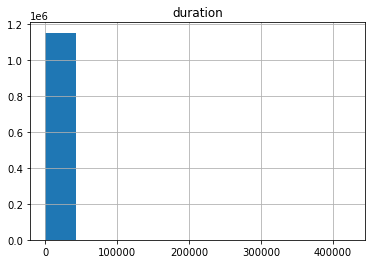

In [31]:
#plt.hist(jan2021_df['duration'])
jan2021_df.hist(column='duration')
# xlabel('num patients');
# ylabel('num treatments');

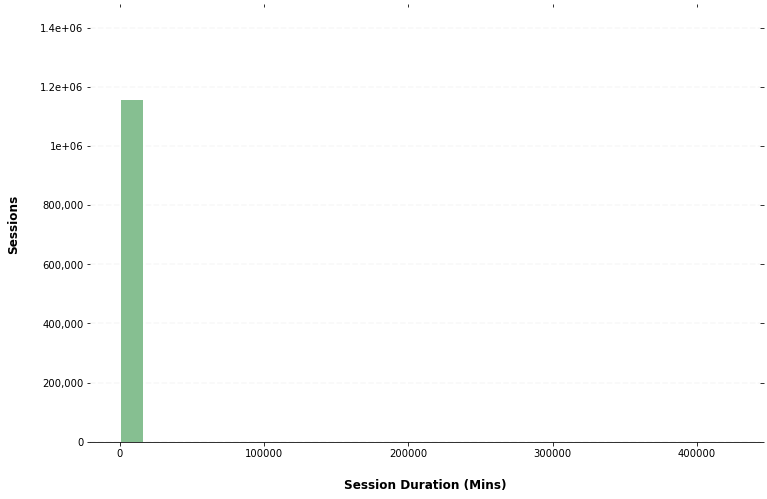

In [32]:
ax = jan2021_df.hist(column='duration', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Mins)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

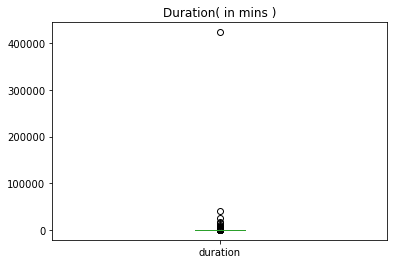

In [33]:
jan2021_df['duration'].plot(kind='box', title='Duration( in mins )')
plt.show()

From all the graphs we can see that there are to many outliers.

In [34]:
jan2021_df = jan2021_df[(jan2021_df.duration >= 1) & (jan2021_df.duration <= 60)]

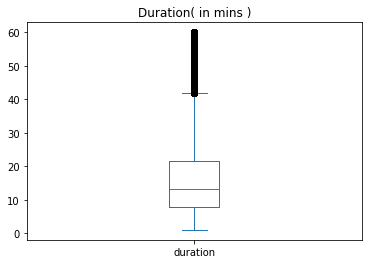

In [35]:
jan2021_df['duration'].plot(kind='box', title='Duration( in mins )')
plt.show()

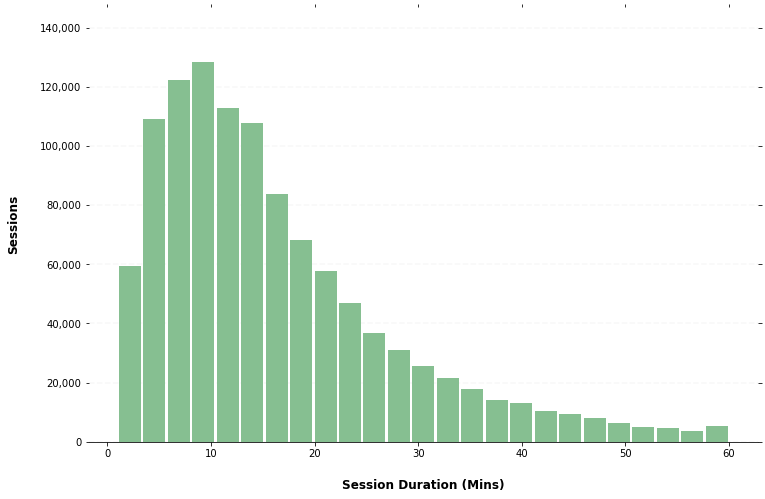

In [36]:
ax = jan2021_df.hist(column='duration', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Mins)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [37]:
jan2021_df.shape[0]

1109826

In [38]:
initial_records_jab2021_df = 1154112
modified_records_jab2021_df = jan2021_df.shape[0]

dropped_records = initial_records_jab2021_df - modified_records_jab2021_df 

print('The number of records dropped are "{0}" '.format(dropped_records))

The number of records dropped are "44286" 


# Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

    53%
    63%
    73%
    83%


In [39]:
jan2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


In [40]:
null_value_cols = [ col for col in jan2021_df.isna().sum().index if jan2021_df.isna().sum()[col] > 0]
null_value_cols

['PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number']

In [41]:
col = ['PUlocationID', 'DOlocationID']
jan2021_df.isna().sum()[col] *100/ len(jan2021_df.index)

PUlocationID    83.527328
DOlocationID    13.327044
dtype: float64

In [42]:
jan2021_df.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [43]:
jan2021_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


In [44]:
features_selected = ['PUlocationID', 'DOlocationID']
jan2021_df[features_selected] = jan2021_df[features_selected].astype(str)

In [45]:
jan2021_df['PUlocationID'] = jan2021_df['PUlocationID'].replace('nan','-1' )
jan2021_df['DOlocationID'] = jan2021_df['DOlocationID'].replace('nan','-1' )

In [46]:
jan2021_df['PUlocationID'][0]

'-1'

In [47]:
jan2021_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1,-1,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1,-1,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1,71.0,None,B00037,9.050000


In [48]:
len(jan2021_df.loc[jan2021_df['PUlocationID']=='-1']['PUlocationID']) * 100  / len(jan2021_df.index)

83.52732770722618

# Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

    Turn the dataframe into a list of dictionaries
    Fit a dictionary vectorizer
    Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).

    2
    152
    352
    525
    725


In [49]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [50]:
features_selected

['PUlocationID', 'DOlocationID']

In [51]:
jan2021_df.shape

(1109826, 8)

In [52]:
train_dicts = jan2021_df[features_selected].to_dict(orient='records')

In [53]:
train_dicts[0:10]

[{'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1', 'DOlocationID': '71.0'},
 {'PUlocationID': '-1', 'DOlocationID': '91.0'},
 {'PUlocationID': '-1', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1', 'DOlocationID': '37.0'},
 {'PUlocationID': '-1', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'}]

In [54]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [55]:
X_train.shape , X_train

((1109826, 525),
 <1109826x525 sparse matrix of type '<class 'numpy.float64'>'
 	with 2219652 stored elements in Compressed Sparse Row format>)

In [56]:
print('the dimensionality of feature matrix is {0}'.format(X_train.shape))

the dimensionality of feature matrix is (1109826, 525)


# Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

    Train a plain linear regression model with default parameters
    Calculate the RMSE of the model on the training data

What's the RMSE on train?

    5.52
    10.52
    15.52
    20.52


In [57]:
target = 'duration'
y_train = jan2021_df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107202131

# Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021).

What's the RMSE on validation?

    6.01
    11.01
    16.01
    21.01


In [58]:
feb2021_df = pd.read_parquet('dataset/fhv_tripdata_2021-02.parquet')

In [59]:
feb2021_df['duration'] = feb2021_df.apply(lambda x:find_duration_mins( x['dropOff_datetime'], x['pickup_datetime']), axis =1)
feb2021_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.800000


In [60]:
feb2021_df = feb2021_df[(feb2021_df.duration >= 1) & (feb2021_df.duration <= 60)]

In [61]:
feb2021_df[features_selected] = feb2021_df[features_selected].astype(str)

feb2021_df['PUlocationID'] = feb2021_df['PUlocationID'].replace('nan','-1' )
feb2021_df['DOlocationID'] = feb2021_df['DOlocationID'].replace('nan','-1' )

In [62]:
feb2021_df.shape

(990113, 8)

In [63]:
val_dicts = feb2021_df[features_selected].to_dict(orient='records')

In [64]:
type(val_dicts),len(val_dicts), type(val_dicts[0]) , len(val_dicts[0])

(list, 990113, dict, 2)

In [65]:
#dv = DictVectorizer() # again initializing the DictVectorizer just messed up the dimension of the dataset
X_val = dv.transform(val_dicts)

X_val

<990113x525 sparse matrix of type '<class 'numpy.float64'>'
	with 1980223 stored elements in Compressed Sparse Row format>

In [66]:
y_val = feb2021_df[target].values


y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.01428311525346

In [224]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/mlops-zoomcamps


'https://jovian.ai/pknayak0707-job/mlops-zoomcamps'

# References:

* https://mode.com/example-gallery/python_histogram/

* https://realpython.com/python-histograms/

* Detect and exclude outliers in a pandas DataFrame (https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe)


Interesting question

What's the difference between nan, NaN and NAN?


>>> numpy.nan is numpy.NaN is numpy.NAN
True

It's just convenient. They're exactly the same.




Different operating systems and programming languages may have different string representations of NaN:

 nan  
 NaN  
 NaN%  
 NAN  
 NaNQ  
 NaNS  
 qNaN  
 sNaN
 1.#SNAN
 1.#QNAN  
 -1.#IND

I think having all three is just a convenience. They are the same.

>>> np.nan
nan
>>> np.NaN
nan
>>> np.NAN
nan
>>> 



# new way to format print in the Python

Python f strings embed expressions into a string literal. You can use f strings to embed variables, strings, or the results of functions into a string. An f string are prefixed with “f” at the start, before the string iitself begins. Introduced in Python 3.6, make it easier to format strings